# Exemplo -- Vibração Livre amortecida
## Solução via análise modal

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib import animation
import ipywidgets as widgets
import IPython.display

## Problema

No sistema mostrado a seguir, as massas devem ser consideradas corpos rígidos, com inércia rotativa e translacional. As rotações devem ser consideradas pequenas.
                
As massas são iguais a 1kg e as todas as molas são idênticas, com rigidez igual a 40N/m. O comprimento das  barras é 0,5m e a distância entre as barras é igual ao seu comprimento.

Calcule as frequências naturais e modos normais do sistema, e a resposta **amortecida** quando o sistema é submetido a algum deslocamento inicial.

![two_bars_01.png](https://drive.google.com/uc?export=view&id=12zQobp3fKeb3FrtXdiZrH-jK4XstaN8q)

In [2]:
M = 1.0
L = 0.5
K = 40.0

## Coordenadas generalizadas

Vamos usar o mesmo sistema de coordenadas generalizadas que no exemplo não amortecido, então teremos também as mesmas matrizes de massa e  rigidez.

## Matriz de massa

$$ \mathbf{m} = \begin{bmatrix}
M &&&& \\
& M &&&& \\ 
&& ML^2/12 && \\
&&& M & \\
&&&& M \\
&&&&& ML^2/12 
\end{bmatrix}$$

In [3]:
m = np.diag([M, M, M*L**2/12, M, M, M*L**2/12])
display(m)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02083333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02083333]])

###  Matriz de rigidez
             
$$ \mathbf{k} = K
\begin{bmatrix}
2.5     &  -0.5    &  -0.25L    &  -0.5   &   -0.5   & -0.25L \\
-0.5    &   2.5    &   0.25L    &   0.5   &  -0.5   &  0.25L\\
-0.25L  &   0.25L  &   0.625L^2 &   0.25L &  -0.25L & 0.125L^2\\
-0.5    &   0.5    &   0.25L    &   2.5   &  -0.5   &  0.25L\\
-0.5    &  -0.5    &  -0.25L    &  -0.5   &   2.5   & -0.25L\\
-0.25L  &   0.25L  &   0.125L^2  &  0.25L  &  -0.25L &  0.625L^2
\end{bmatrix}.$$

Para os dados do problema, ficamos com

In [4]:
k = K*np.array([[2.5,    -0.5,    -0.25*L,    -0.5,    -0.5,   -0.25*L],
                 [-0.5,    2.5,     0.25*L,     0.5,    -0.5,    0.25*L],
                 [-0.25*L, 0.25*L,  0.625*L**2, 0.25*L, -0.25*L, 0.125*L**2],
                 [-0.5,    0.5,     0.25*L,     2.5,    -0.5,    0.25*L],
                 [-0.5,   -0.5,    -0.25*L,    -0.5,     2.5,   -0.25*L], 
                 [-0.25*L, 0.25*L,  0.125*L**2, 0.25*L, -0.25*L, 0.625*L**2]])
display(k)

array([[100.  , -20.  ,  -5.  , -20.  , -20.  ,  -5.  ],
       [-20.  , 100.  ,   5.  ,  20.  , -20.  ,   5.  ],
       [ -5.  ,   5.  ,   6.25,   5.  ,  -5.  ,   1.25],
       [-20.  ,  20.  ,   5.  , 100.  , -20.  ,   5.  ],
       [-20.  , -20.  ,  -5.  , -20.  , 100.  ,  -5.  ],
       [ -5.  ,   5.  ,   1.25,   5.  ,  -5.  ,   6.25]])

## Frequências naturais e modos de vibração

A equação que gera as frequências naturais e modos normais é
$$ \left( \mathbf{k} - \omega^2 \mathbf{m}\right) \mathbf X = \mathbf{0}.$$

Com a escolha de coordenadas generalizadas feita, a matriz de massa é diagonal, isto é, não há acoplamento inercial, mas a matriz de rigidez é completamente cheia, isto é, há acoplamento elástico entre todas as coordenadas generalizadas!

Como a matriz de massa é diagonal, sua inversa é trivial, vamos então pré-multiplicar a equação acima pela inversa da matriz de massa, 

$$\begin{align*}
\left(\mathbf{k} - \omega^2 \mathbf{m}\right) \mathbf X &= \mathbf{0} \\
\mathbf{k} \mathbf X &= \omega^2 \mathbf{m}  \mathbf X  \\
 \mathbf{m}^{-1}\mathbf{k} \mathbf X &= \omega^2 \mathbf{m}^{-1}\mathbf{m}  \mathbf X  \\
 \mathbf{D}^{-1}\mathbf X &= \omega^2 \mathbf{I}\mathbf X  \\
\end{align*}$$

o que leva ao problema de autovalores e autovetores
$$  \omega^2 \mathbf X =
\mathbf{D}^{-1}\mathbf X, $$

que vamos resolver computacionalmente.

In [5]:
Di = np.linalg.inv(m)@k
display(Di)

array([[ 100.,  -20.,   -5.,  -20.,  -20.,   -5.],
       [ -20.,  100.,    5.,   20.,  -20.,    5.],
       [-240.,  240.,  300.,  240., -240.,   60.],
       [ -20.,   20.,    5.,  100.,  -20.,    5.],
       [ -20.,  -20.,   -5.,  -20.,  100.,   -5.],
       [-240.,  240.,   60.,  240., -240.,  300.]])

In [6]:
uvals, uvecs = np.linalg.eig(Di)
display(uvals)
display(uvecs)

array([397.45983223,  52.84449074, 120.        , 109.69567703,
        80.        , 240.        ])

array([[-2.59169398e-02,  5.12722271e-01, -7.07106781e-01,
         1.02377651e-01, -1.62712650e-16, -5.18457713e-17],
       [ 2.91824792e-02,  2.42516404e-01,  3.23554614e-15,
        -2.40280081e-01, -7.07106781e-01,  1.40929642e-16],
       [ 7.06028820e-01,  4.22257821e-01, -7.69560153e-15,
         6.57102959e-01, -5.34722814e-16, -7.07106781e-01],
       [ 2.91824792e-02,  2.42516404e-01,  1.73067014e-15,
        -2.40280081e-01,  7.07106781e-01,  6.59219014e-17],
       [-2.59169398e-02,  5.12722271e-01,  7.07106781e-01,
         1.02377651e-01, -4.13849194e-16,  1.08751251e-16],
       [ 7.06028820e-01,  4.22257821e-01, -7.93955888e-15,
         6.57102959e-01, -1.06207875e-15,  7.07106781e-01]])

### Ordenação

Percebam que os autovalores não saem em alguma ordem pré-especificada, precisamos ordená-los em ordem crescente.

In [7]:
idx = uvals.argsort()
vals = uvals[idx]
vecs = uvecs[:,idx]
display(vals)

array([ 52.84449074,  80.        , 109.69567703, 120.        ,
       240.        , 397.45983223])

### Frequências naturais

As frequências naturais e os modos normais correspondentes são então 


In [8]:
ws = np.sqrt(vals)
for w, v in zip(ws, vecs.T):
   print(f'Frequência natural: {w}\n   Modo de vibração: {v}\n')

Frequência natural: 7.269421623345975
   Modo de vibração: [0.51272227 0.2425164  0.42225782 0.2425164  0.51272227 0.42225782]

Frequência natural: 8.94427190999916
   Modo de vibração: [-1.62712650e-16 -7.07106781e-01 -5.34722814e-16  7.07106781e-01
 -4.13849194e-16 -1.06207875e-15]

Frequência natural: 10.473570404934213
   Modo de vibração: [ 0.10237765 -0.24028008  0.65710296 -0.24028008  0.10237765  0.65710296]

Frequência natural: 10.954451150103326
   Modo de vibração: [-7.07106781e-01  3.23554614e-15 -7.69560153e-15  1.73067014e-15
  7.07106781e-01 -7.93955888e-15]

Frequência natural: 15.491933384829668
   Modo de vibração: [-5.18457713e-17  1.40929642e-16 -7.07106781e-01  6.59219014e-17
  1.08751251e-16  7.07106781e-01]

Frequência natural: 19.936394664906604
   Modo de vibração: [-0.02591694  0.02918248  0.70602882  0.02918248 -0.02591694  0.70602882]



## Visualização


In [9]:
#@ Title Code
b = 0.1*L
h = L
b2 = 0.5*b
h2 = 0.5*h

choose_mode = widgets.SelectionSlider(
    options=[str(i) for i in range(1, ws.size+1)],
    value='1', # Defaults to 'pineapple'
    description='Modo:',
    disabled=False)

@widgets.interact
def make_plot(mode=choose_mode):
    # Original positions. Be careful angles are in degrees!
    o1 = np.array([-b2, -h2])
    o2 = o1 + np.array([2*h, 0.0])
    r1 = Rectangle(o1, b, h, angle=0.0, rotation_point='center', alpha=0.25)
    r2 = Rectangle(o2, b, h, angle=0.0, rotation_point='center', fc='red', alpha=0.25)

    ##  Displaced position
    # Normalize displacements
    mode = int(mode)-1
    X = vecs[:,mode]
    X = X/X.max()*5*b

    p1 = o1 + X[0:2]
    a1 = np.degrees(X[2])
    p2 = o2 + X[3:5]
    a2 = np.degrees(X[5])

    rf1 = Rectangle(p1, b, h, angle=a1, rotation_point='center', alpha=1)
    rf2 = Rectangle(p2, b, h, angle=a2, rotation_point='center', fc='red', alpha=1)

    # Plot setup
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6)
    ax.set_xlim([-h,3*h])
    ax.set_ylim([-h, h])
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_title(f'Modo de vibração para o modo {mode+1},' +
                    r' $\omega = {}$'+f'{ws[mode]:7.4f}')

    # Plot original position
    ax.add_patch(r1)
    ax.add_patch(r2)

    # Plot final position
    ax.add_patch(rf1)
    ax.add_patch(rf2)

interactive(children=(SelectionSlider(description='Modo:', options=('1', '2', '3', '4', '5', '6'), value='1'),…

## Normalização

Para a solução via análise modal, vamos normalizar os modos de vibração.

Para os modos calculados, os coeficiented de massa generalizados são dados por
$$\DeclareMathOperator{\diag}{diag} M_{ii} = \diag \left(   \overline{\mathbf X}^T \mathbf m \overline{\mathbf X} \right),$$
onde $\overline{\mathbf X}$ é a matrix modal, o que chamamos de *vecs* aqui no código.

In [14]:
n = m.shape[0]
Mg = np.zeros(n)
for i in range(n):
    Mg[i] = vecs.T[i,:]@m@vecs[:,i]
display(Mg)

array([0.6508259 , 1.        , 0.15442241, 1.        , 0.02083333,
       0.02381647])

Cada modo de vibração é normalizado com $X_i = X_i/\sqrt{M_{ii}}$, então a matriz modal torna-se

In [15]:
Xm = vecs / np.sqrt(Mg)
display(Xm)

array([[ 6.35550065e-01, -1.62712650e-16,  2.60525352e-01,
        -7.07106781e-01, -3.59198040e-16, -1.67936465e-01],
       [ 3.00613656e-01, -7.07106781e-01, -6.11452326e-01,
         3.23554614e-15,  9.76389201e-16,  1.89096491e-01],
       [ 5.23413943e-01, -5.34722814e-16,  1.67216163e+00,
        -7.69560153e-15, -4.89897949e+00,  4.57492222e+00],
       [ 3.00613656e-01,  7.07106781e-01, -6.11452326e-01,
         1.73067014e-15,  4.56720330e-16,  1.89096491e-01],
       [ 6.35550065e-01, -4.13849194e-16,  2.60525352e-01,
         7.07106781e-01,  7.53450770e-16, -1.67936465e-01],
       [ 5.23413943e-01, -1.06207875e-15,  1.67216163e+00,
        -7.93955888e-15,  4.89897949e+00,  4.57492222e+00]])

Cuidado que nesta o0peração usamos o broadcasting do Numpy, o que não é uma coisa super óbvia.

Verificando,

In [12]:
display(np.sqrt(np.diag(Xm.T@k@Xm)))

array([ 7.26942162,  8.94427191, 10.4735704 , 10.95445115, 15.49193338,
       19.93639466])

que são exatamente as frequências naturais, como esperado.

## Resposta amortecida via análise modal

Vamos mudar para as coordenadas generalizadas, fazendo $\mathbf x(t) = \overline{\mathbf X} \mathbf q(t)$.

Introduzindo na equação de movimento, ficamos com 
$$ \mathbf m \overline{\mathbf X} \ddot{\mathbf q} + 
\mathbf c \overline{\mathbf X} \dot{\mathbf q} +
\mathbf k \overline{\mathbf X} \mathbf q = \mathbf 0,$$
e pré-multiplicando pela transposta da matriz modal,
$$ \overline{\mathbf X}^T\mathbf m \overline{\mathbf X} \ddot{\mathbf q} + 
\overline{\mathbf X}^T\mathbf c \overline{\mathbf X} \dot{\mathbf q} +
\overline{\mathbf X}^T\mathbf k \overline{\mathbf X} \mathbf q = \mathbf 0,$$
e devido à ortogonalidade dos modos em relação às matrizes de massa e rigidez ficamos com
$$  \ddot{\mathbf q}+ 
\overline{\mathbf X}^T\mathbf c \overline{\mathbf X} \dot{\mathbf q} +  \mathbf{\omega}^2 \mathbf q = \mathbf 0,$$
onde $\mathbf{\omega}^2$ é uma matriz diagonal com os quadrados das frequências naturais.


### Amortecimento proporcional

Para diagonalizar a matriz de amortecimento, precisamos introduzir a hipótese do amortecimento proporcional.

$$ \mathbf{c} = \alpha \mathbf{m} + \beta \mathbf{k},$$
então
$$  \ddot{\mathbf q}+ 
\overline{\mathbf X}^T\left[\alpha \mathbf{m} + \beta \mathbf{k}\right] \overline{\mathbf X} \dot{\mathbf q} +  \mathbf{\omega}^2 \mathbf q = \mathbf 0,$$
ou
$$  \ddot{\mathbf q}+ 
\left[\overline{\mathbf X}^T\mathbf{m}\overline{\mathbf X}\alpha  + \beta \overline{\mathbf X}^T\mathbf{k}\overline{\mathbf X} + \overline{\mathbf X}\right]  \dot{\mathbf q} +  \mathbf{\omega}^2 \mathbf q = \mathbf 0,$$
e assim,
$$  \ddot{\mathbf q}+ 
\left[\alpha\mathbf{I}  + \beta\mathbf{\omega}^2 \right] \dot{\mathbf q} +  \mathbf{\omega}^2 \mathbf q = \mathbf 0,$$

Temos então $n$ equações diferenciais de segunda ordem, da forma
$$ \ddot q_i(t) + \left[\alpha + \beta \omega_i^2  \right]\dot q_i + \omega_i^2 q(t) = 0,$$
para $n = 1,\ldots, n$. Definimos  $2\zeta_i\omega_i = \alpha + \beta \omega_i^2$, ficando com
$$ \ddot q_i(t) + 2\zeta_i\omega_i\dot q_i + \omega_i^2 q(t) = 0,$$
que são equações que representam $n$ sistemas com 1 GL em vibração livre amortecida.



### Soluções

As soluções são dadas por

$$ 
q_i(t) = e^{-\zeta_i\omega_i t} \left[ \cos \omega_{di} t + \frac{\zeta_i}{\sqrt{1-\zeta_i^2} }\sin \omega_{di} t\right]q_i(0)
      + \left[ \frac{1}{\omega_{di}}e^{-\zeta_i\omega_i t}  \sin \omega_{di} t \right]\dot q_i(0)
$$

Arbitrar dois zetas, calcular os al;hasd e gbetas e mostrar a matrix de amortecimento resultante.


### Condições iniciais

Precisamos das condições iniciais *das coordenadas generalizadas*, obtidas com
$$  \overline{\mathbf X}^T\mathbf m \mathbf x(t) =   \overline{\mathbf X}^T\mathbf m \overline{\mathbf X} \mathbf q(t),$$
o que leva a 
$$ \mathbf q(t) =  \overline{\mathbf X}^T\mathbf m \mathbf x(t),$$
assim, $ \mathbf q(0) =  \overline{\mathbf X}^T\mathbf m \mathbf x(0)$  e
$ \dot{\mathbf q}(0) =  \overline{\mathbf X}^T\mathbf m \dot{\mathbf x}(0)$. 

In [13]:
x0 = np.array([0, 0, 0, 0.1, -0.1, 0])
v0 = np.array([0, 0, 0, 0.0, 0, 0])

q0 = Xm.T@m@x0
qv0 = Xm.T@m@v0

display(q0)
display(qv0)

array([-3.34936409e-02,  7.07106781e-02, -8.71977678e-02, -7.07106781e-02,
       -2.96730440e-17,  3.57032956e-02])

array([0., 0., 0., 0., 0., 0.])

Podemos então calcular as constantes de todas as equações

In [14]:
A1 = q0.copy()
A2 = qv0.copy()/ws

## Plotagem da resposta modal

Vamos plotar alguns períodos da frequência fundamental para ter uma visão razoável do movimento.

Estas são as coordenadas generalizaas, então a resposta será senoidal!

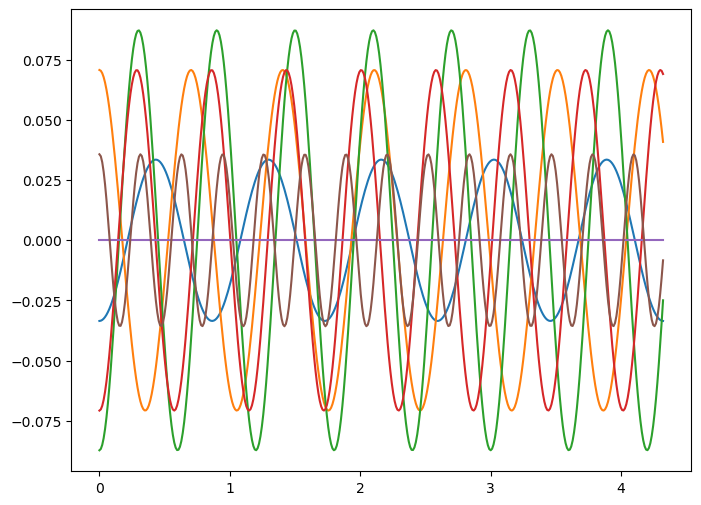

In [15]:
tau = 2*np.pi/ws[0]
ppp = 80 # points per period
ntau = 5 # periods to plot
tend = ntau*tau
ntimes = ntau*ppp
times = np.linspace(0, tend, ntimes)


wt = ws[:,np.newaxis]@times[np.newaxis,:]
qt = A1[:,np.newaxis]*np.cos(wt) + A2[:,np.newaxis]*np.cos(wt)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,6)
_ = plt.plot(times, qt.T)

## Plotagem da resposta nas coordenas reais

Precisamos apenas tranformar de volta para as coordenadas reais usando a definição $\mathbf x(t) = \overline{\mathbf X} \mathbf q(t)$,


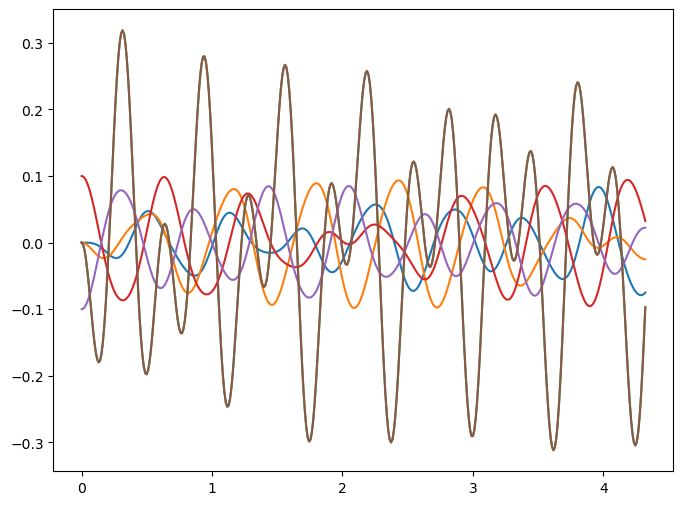

In [16]:
xt = Xm@qt

fig4, ax4 = plt.subplots()
fig4.set_size_inches(8,6)
_ = plt.plot(times, xt.T)

## Animação


In [17]:
# Original positions. Be careful angles are in degrees!
o1 = np.array([-b2, -h2])
o2 = o1 + np.array([2*h, 0.0])
r1 = Rectangle(o1, b, h, angle=0.0, rotation_point='center')
r2 = Rectangle(o2, b, h, angle=0.0, rotation_point='center', fc='red')

# Plot setup
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8,6)
ax3.set_xlim([-h,3*h])
ax3.set_ylim([-h, h])
ax3.xaxis.set_major_locator(ticker.NullLocator())
ax3.yaxis.set_major_locator(ticker.NullLocator())
ax3.set_title(f'Resposta')

# Plot original position
ax3.add_patch(r1)
ax3.add_patch(r2)

def animate(i):
    r1.set_xy(o1+xt[0:2,i])
    r1.angle = np.degrees(xt[2,i])
    r2.set_xy(o2+xt[3:5,i])
    r2.angle = np.degrees(xt[5,i])
    return r1, r2

anim = animation.FuncAnimation(fig3, animate,
                               frames=xt.shape[1], 
                               interval=50,
                               blit=True)
plt.close(fig3)

In [18]:
IPython.display.HTML(anim.to_html5_video())